# Seaborn 1: Basics
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

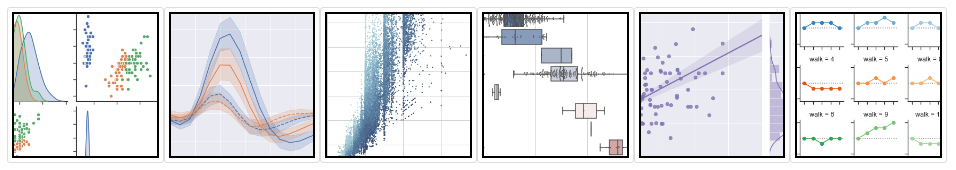

See here for the official page:
https://seaborn.pydata.org/index.html

In this notebook, we will start to look at the basics of creating Seaborn visualisations.

First, let's load numpy and pandas for list and data set manipulation.  These libraries are standard for pretty much any Python data analysis:

In [1]:
import numpy as np
import pandas as pd

Now, load matplotlib and seaborn for data visualisation:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

We usually start by settings a Seaborn style.  We will look at styling later:

In [3]:
sns.set(style="darkgrid")

Now load our data.  We will use some data from [Gapminder](https://www.gapminder.org/data/):

In [4]:
world_data = pd.read_csv('world_data.csv')

Let's take a quick peek at our data:

In [5]:
world_data.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,...,foodsupply,sexratio,population,region,lifeexpband,highlifeexp,happinessband,sexbalance,incomeband,highincome
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,...,2090.0,106.0,33700000,South Asia,L,0.0,1.0,M,1.0,0.0
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,...,3190.0,101.0,2920000,Europe & Central Asia,H,1.0,1.0,M,3.0,0.0
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,...,3230.0,95.7,43400000,Latin America & Caribbean,H,1.0,4.0,F,4.0,1.0
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,...,2930.0,87.9,2920000,Europe & Central Asia,H,1.0,1.0,F,3.0,0.0
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,...,3280.0,100.0,23800000,East Asia & Pacific,H,1.0,4.0,F,5.0,1.0


In [6]:
world_data.shape

(194, 25)

## Scatter Plot
A scatter plot can be used to visualise the relationship between two features.  We will use the [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) function, which focusses on creating relational plots (i.e. plots relating two features):

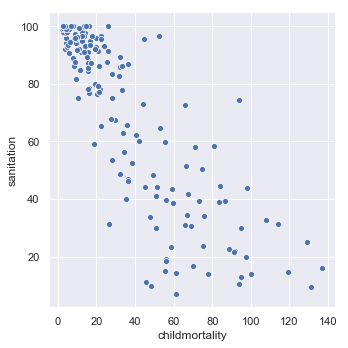

In [7]:
sns.relplot(x="childmortality", y="sanitation", data=world_data)

We can add a hue parameter to select a feature to assign a colour to:

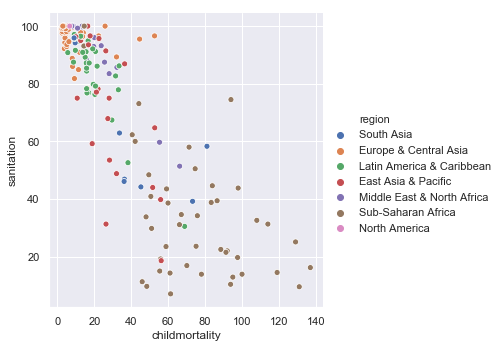

In [8]:
sns.relplot(x="childmortality", y="sanitation", hue="region", data=world_data)

Or can use different marker styles to indicate the feature:

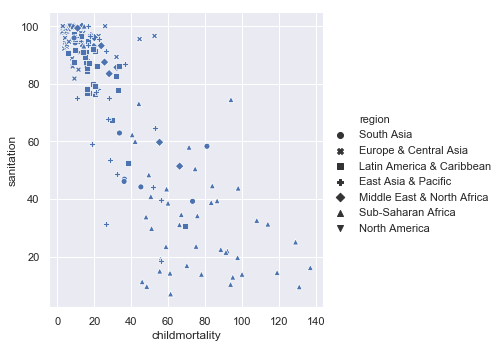

In [9]:
sns.relplot(x="childmortality", y="sanitation", style="region", data=world_data)

We can also use the colour for one feature and the style for another.

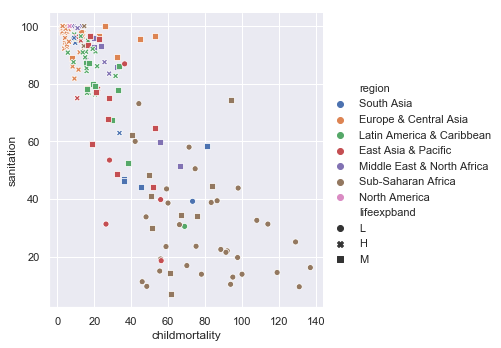

In [10]:
sns.relplot(x="childmortality", y="sanitation", hue="region", style="lifeexpband", data=world_data)

We can also assign a hue to a numeric rather than categorical feature.  In this case we get a sequential colour scale.

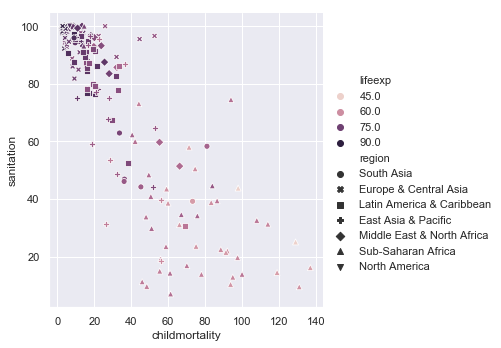

In [11]:
sns.relplot(x="childmortality", y="sanitation", hue="lifeexp", style="region", data=world_data)

The size of the circles can also be assigned to a feature, which can be categorical:

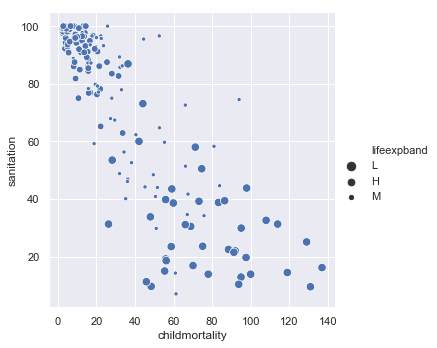

In [12]:
sns.relplot(x="childmortality", y="sanitation", size="lifeexpband", data=world_data)

or numeric:

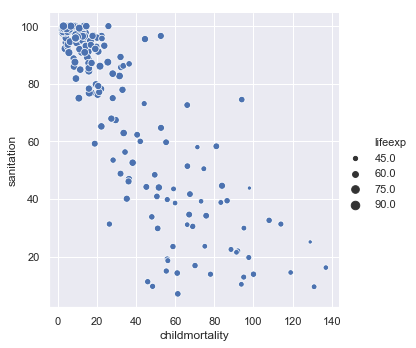

In [13]:
sns.relplot(x="childmortality", y="sanitation", size="lifeexp", data=world_data)

## Line plots

Line plots can be used to plot one line for a single feature against another continuous feature such as time.

Let's load a data set containing information about the daily calorie intake of individuals in the USA:

In [14]:
food_supply_united_states = pd.read_csv('food_supply_united_states.csv')

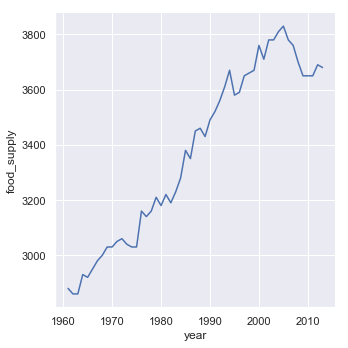

In [15]:
rel = sns.relplot(x="year", y="food_supply", kind="line", data=food_supply_united_states)

We can change the y origin to 0.  To do this we need to call a function in Matplotlib:

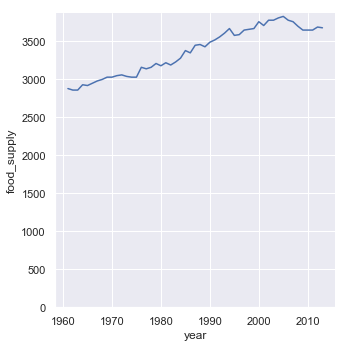

In [16]:
rel = sns.relplot(x="year", y="food_supply", kind="line", data=food_supply_united_states)
plt.ylim(0,)
plt.show()

Seaborn will also automatically aggregate data for us.  Here we load a data set containing food supply data for all countries in the middle east.  

In [17]:
food_supply_middle_east_countries = pd.read_csv('food_supply_middle_east_countries.csv')

In [18]:
food_supply_middle_east_countries.head()

,country,year,food_supply,region
0,Algeria,1961,1620.0,Middle East & North Africa
1,Djibouti,1961,1610.0,Middle East & North Africa
2,Egypt,1961,2080.0,Middle East & North Africa
3,Iran,1961,1750.0,Middle East & North Africa
4,Iraq,1961,1740.0,Middle East & North Africa


If we plot the food supply, Seaborn will plot the aggregate of all countries food supply:

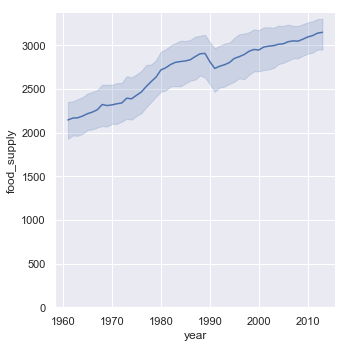

In [19]:
g = sns.relplot(kind="line", x="year", y="food_supply", data=food_supply_middle_east_countries)
plt.ylim(0,)
plt.show()

The line plot is the mean and the shaded area is the 95% confidence interval.  This indicates that, based on this sample of data, we can be 95% confident that the *true* mean sits within the shaded area.  We can disable this (and process the plot quicker) by setting the ci parameter to None:

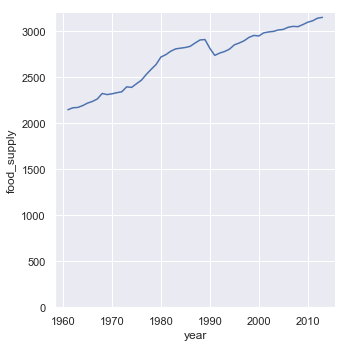

In [20]:
g = sns.relplot(kind="line", x="year", y="food_supply", ci=None, data=food_supply_middle_east_countries)
plt.ylim(0,)
plt.show()

We can plot multiple lines, setting the hue parameter to the region feature.

Let's first load the food supply data for all countries:

In [21]:
food_supply = pd.read_csv('food_supply.csv')

Now, we plot the food supply for each region:

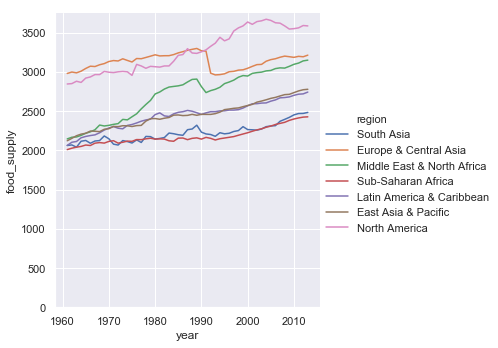

In [22]:
g = sns.relplot(kind="line", x="year", y="food_supply", hue="region", ci=None, data=food_supply)
plt.ylim(0,)
plt.show()

We can also use styles.  Seaborn gives us 6 by default.  If we have more than 6, we need to specify our own dash styles:

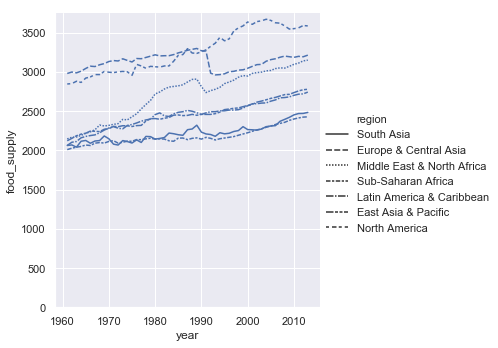

In [23]:
# Specify dashes as a tuple of (segment, gap) lengths
dash_styles = ["", # solid
               (4, 1.5),           # 4 on, 1.5 off
               (1, 1),             # 1 on, 1 off
               (3, 1, 1.5, 1),     # 3 on, 1 off, 1.5 on, 1 off
               (5, 1, 1, 1),       # etc
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2)]

# Plot the lines
g = sns.relplot(kind="line", x="year", y="food_supply", style="region", ci=None, dashes=dash_styles,data=food_supply)
plt.ylim(0,)
plt.show()

## Facets
We can use facets to break the visualisation out into multiple plots (sometimes called lattice plots).  This is a really useful feature of Seaborn as this sort of visualisation is very effective for spotting patterns across a large number of data points.

Let's load some data that has both food supply and life expectancy band for all countries:

In [24]:
food_supply = pd.read_csv('food_supply_lifeexpband.csv')

We can plot the aggregate food supply for all countries:

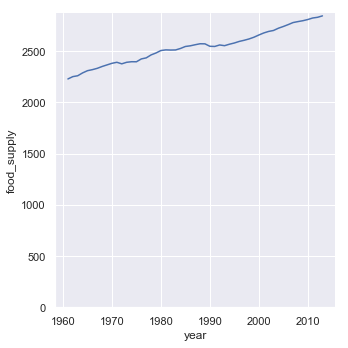

In [25]:
g = sns.relplot(kind="line", x="year", y="food_supply", ci=None, data=food_supply)
plt.ylim(0,)
plt.show()

By specifying the col parameter, we can split out the region into columns

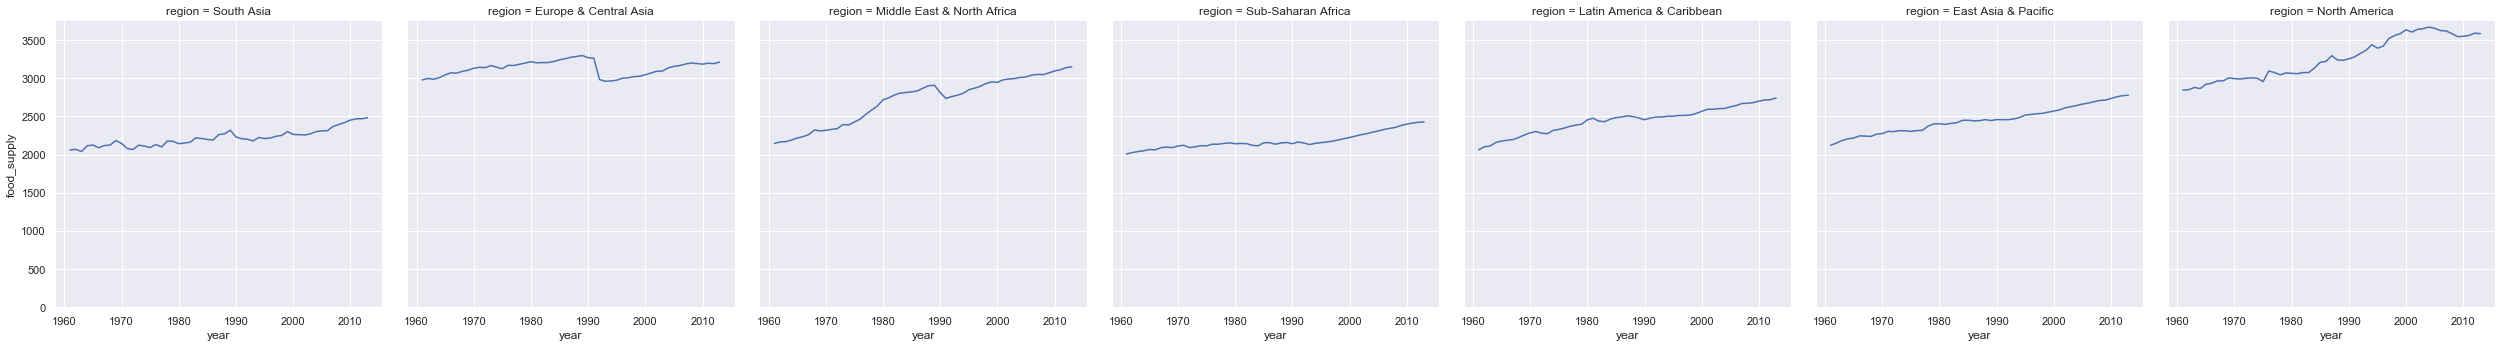

In [26]:
g = sns.relplot(kind="line", x="year", y="food_supply", col="region", ci=None, data=food_supply)
plt.ylim(0,)
plt.show()

Additionally, we can split out the lifeexpband onto rows:

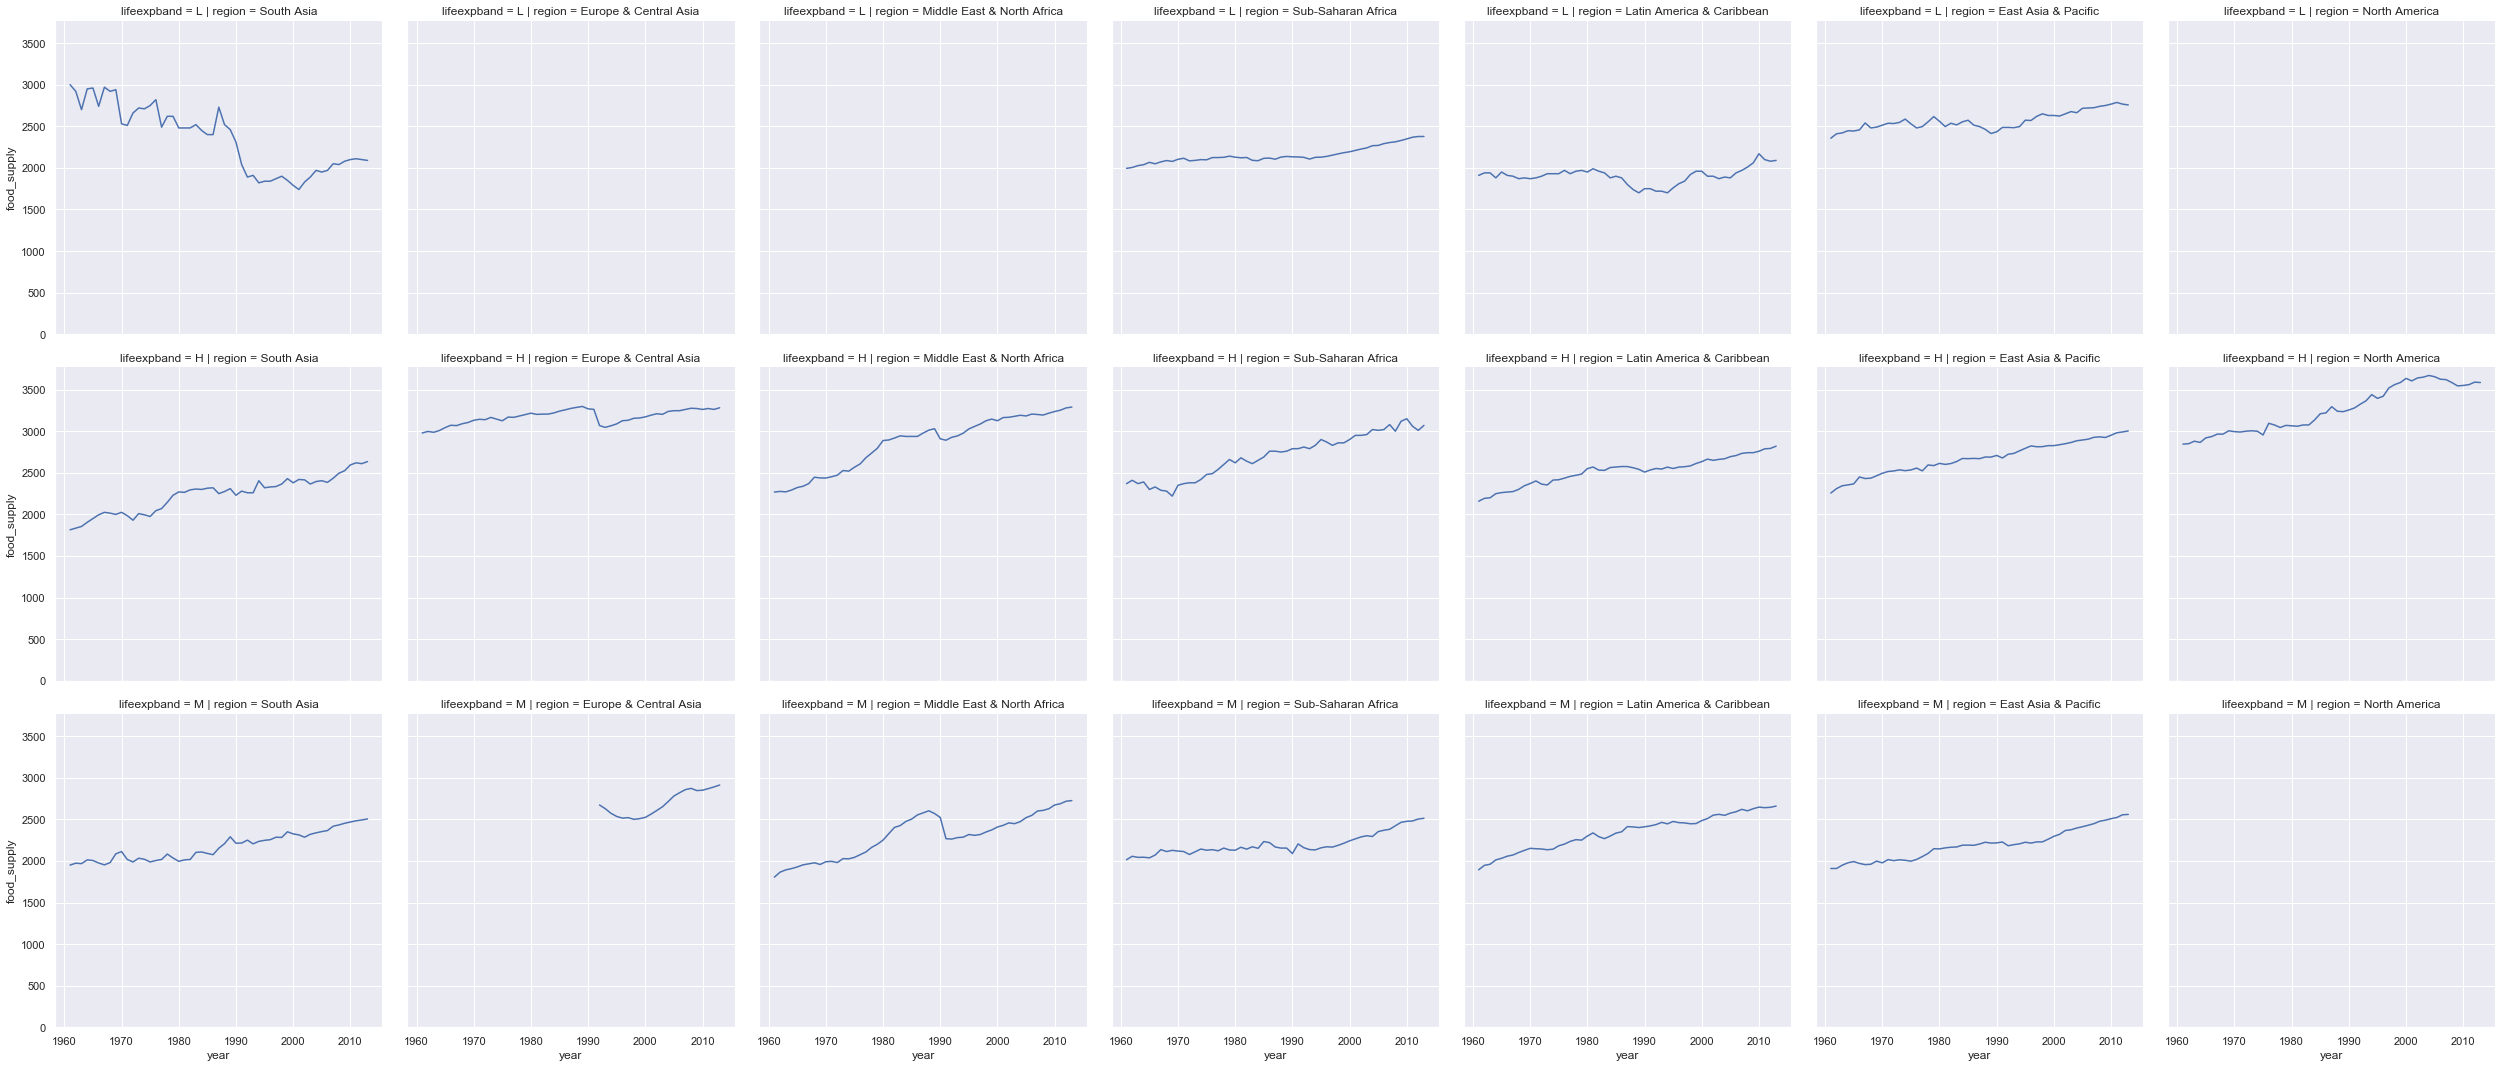

In [27]:
g = sns.relplot(kind="line", x="year", y="food_supply", col="region", row='lifeexpband', ci=None, data=food_supply)
plt.ylim(0,)
plt.show()

We may want to wrap around after a certain number of columns:

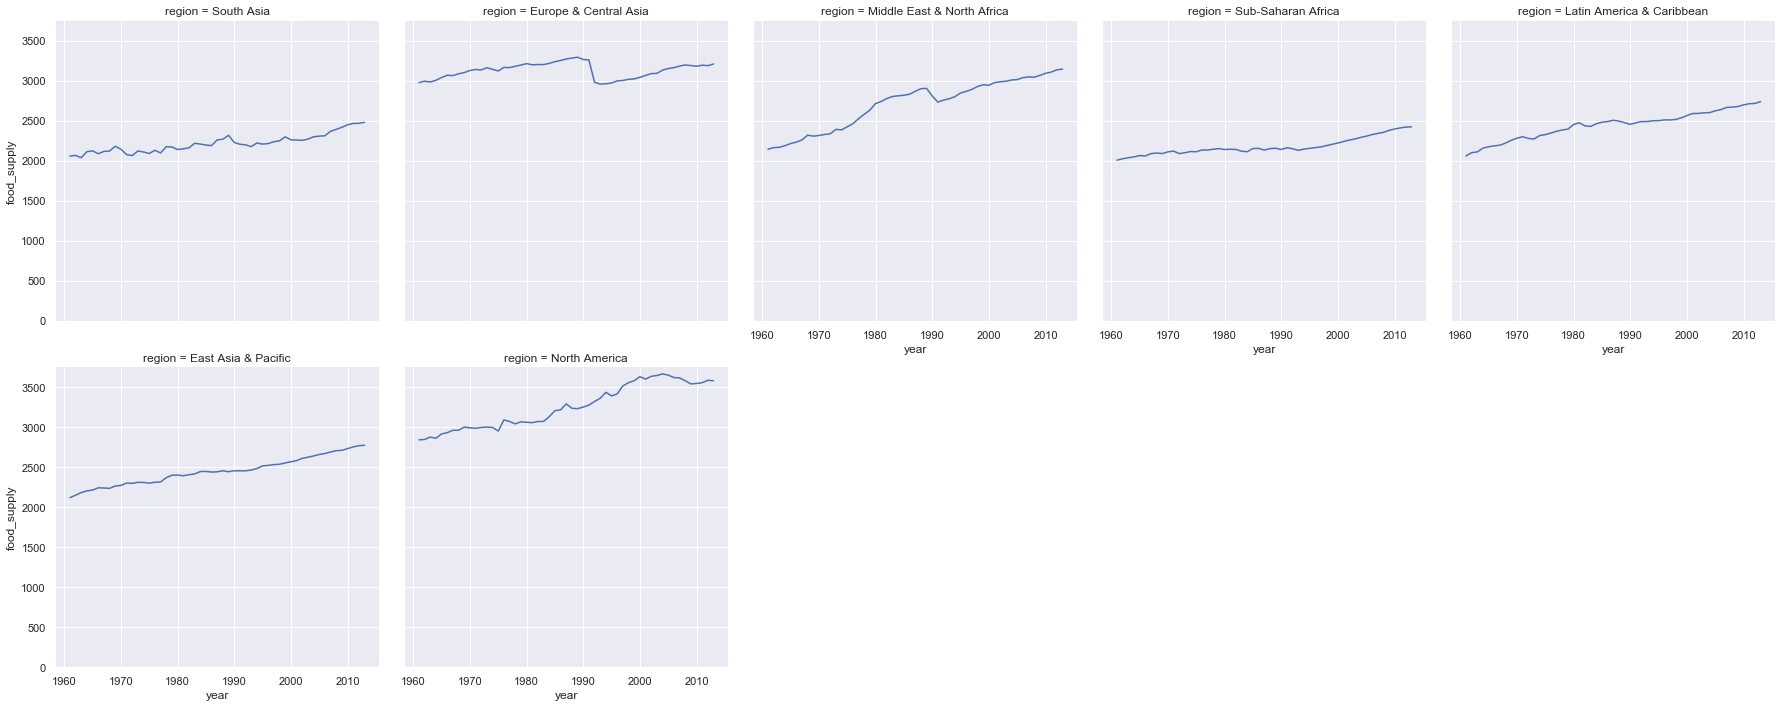

In [28]:
g = sns.relplot(kind="line", x="year", y="food_supply", col="region", col_wrap=5, ci=None, data=food_supply)
plt.ylim(0,)
plt.show()

Don't forget that you can process your data before visualising.  For example, here I filter the data to just contain European and Central Asian countries, then produce a lattice plot of the food supply for each country:

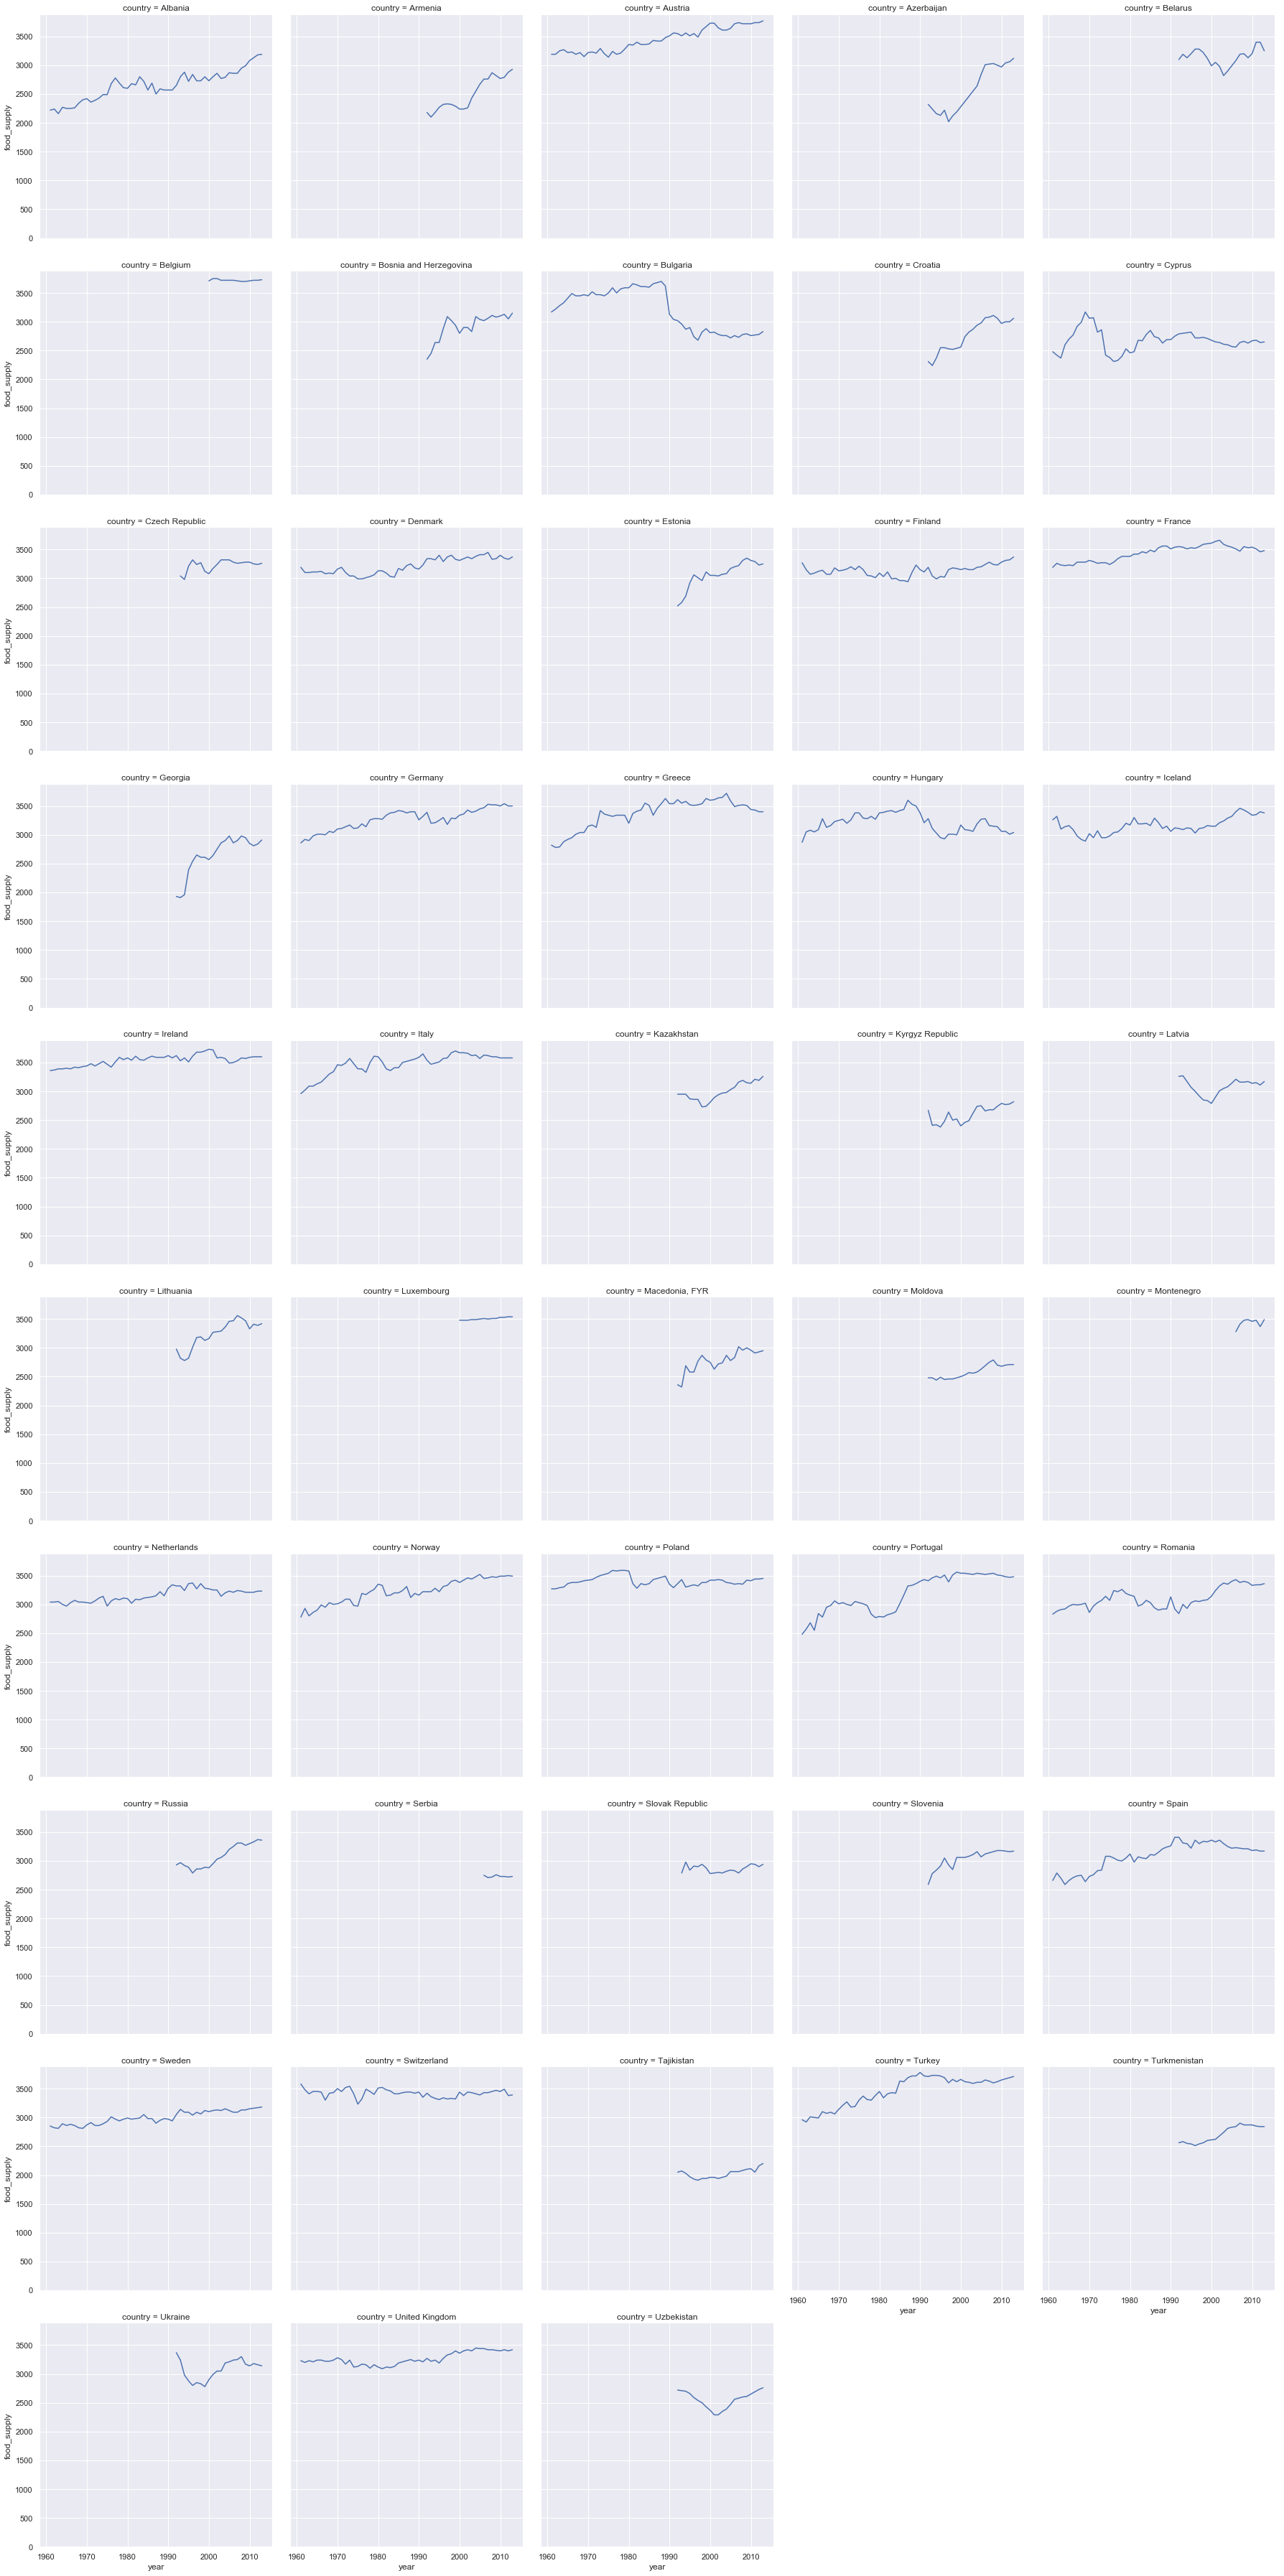

In [29]:
food_supply_europe = food_supply[food_supply.region=="Europe & Central Asia"]
g = sns.relplot(kind="line", x="year", y="food_supply", col="country", col_wrap=5, ci=None, data=food_supply_europe)
plt.ylim(0,)
plt.show()

<hr/>

## Activity >>
The file income.csv contains the gdp per capita for all countries.  Load the data and carry out some visual analyses on it.

<hr/>